# Initial Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Updating the Workiing Directory
import os
path = '..path'
os.chdir(path)


In [ ]:
# https://programminghistorian.org/en/lessons/sentiment-analysis#exploring-text-with-sentiment-analysis
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a 

In [ ]:
# Importing relevant packages
# NLTK FOR LANGUAGE PROCESSING

import nltk
import os
nltk.download('punkt')
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

from string import punctuation
nltk.download('wordnet')

from nltk.tokenize import regexp_tokenize

import re
from collections import Counter

# Basic Libraries for data processing

import pandas as pd
import numpy as np
import random
import string
from datetime import datetime
import pytz
 
import time
import math

import bs4 as bs
import urllib.request

# Visualisation libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Modelling Support libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata


# other libraries are imported closer to the cell execution

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from datetime import datetime
import pytz
 

import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

tz = pytz.timezone('America/Chicago') 
datetime_CH = datetime.now(tz)
print(datetime_CH)

2020-06-17 08:59:05.699661-05:00


## Reading the Data

In [ ]:
#Reading the dataset

data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='iso8859-1', header = None)
data.head()

0  ...                                                  5
0  0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  0  ...  is upset that he can't update his Facebook by ...
2  0  ...  @Kenichan I dived many times for the ball. Man...
3  0  ...    my whole body feels itchy and like its on fire 
4  0  ...  @nationwideclass no, it's not behaving at all....

[5 rows x 6 columns]

In [ ]:
# Renaming the columns to appropriate heads
data.columns = ["Target", "Id","Date","Flag","User","SentimentText"]
data.head()

Target  ...                                      SentimentText
0       0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  ...  is upset that he can't update his Facebook by ...
2       0  ...  @Kenichan I dived many times for the ball. Man...
3       0  ...    my whole body feels itchy and like its on fire 
4       0  ...  @nationwideclass no, it's not behaving at all....

[5 rows x 6 columns]

In [ ]:
#Looking at the variable structure
data.dtypes
#we would need to update the dtype for target to category

Target            int64
Id                int64
Date             object
Flag             object
User             object
SentimentText    object
dtype: object

In [ ]:
data["Target"] = data["Target"].apply(lambda x: '1' if x==4 else '0') #to simplify the dataset 
data['Target'] = data['Target'].astype('category')

In [ ]:
data['Tweet_Length'] = data['SentimentText'].apply(lambda x:len(x))
data['Raw_word_count'] = data['SentimentText'].apply(lambda x:len(x.split(' ')))
data.head()

Target          Id  ... Tweet_Length Raw_word_count
0      0  1467810369  ...          115             20
1      0  1467810672  ...          111             22
2      0  1467810917  ...           89             19
3      0  1467811184  ...           47             11
4      0  1467811193  ...          111             22

[5 rows x 8 columns]

In [ ]:
print("Distribution of target variable")
pd.DataFrame(data["Target"].value_counts())


Distribution of target variable


Target
1  800000
0  800000

In [ ]:
print("Stats for Raw Word Counts\n")
pd.DataFrame(data["Raw_word_count"].describe().astype('int'))

Stats for Raw Word Counts



Raw_word_count
count         1600000
mean               14
std                 7
min                 2
25%                 9
50%                13
75%                20
max               110

In [ ]:
print("Stats for Raw Word Counts\n")
pd.DataFrame(data["Tweet_Length"].describe().astype('int'))

Stats for Raw Word Counts



Tweet_Length
count       1600000
mean             74
std              36
min               6
25%              44
50%              69
75%             104
max             374

In [ ]:
pd.DataFrame(data.loc[data['Tweet_Length']>=140,['Tweet_Length','SentimentText','Raw_word_count']]).sort_values(by='Tweet_Length', ascending=False)

Tweet_Length  ... Raw_word_count
1295281           374  ...              4
1484882           369  ...              6
380539            359  ...             11
1582941           359  ...              8
650945            348  ...             18
...               ...  ...            ...
316360            140  ...             28
1139328           140  ...             21
316137            140  ...             19
698869            140  ...             28
1275712           140  ...             27

[19905 rows x 3 columns]

In [ ]:
data.groupby('Target').mean()[['Tweet_Length', 'Raw_word_count']]

Tweet_Length  Raw_word_count
Target                              
0          74.301790       14.780492
1          73.878433       13.983769

In [ ]:
data.loc[data['Tweet_Length']>140,:].groupby('Target').mean()[['Tweet_Length', 'Raw_word_count']]

Tweet_Length  Raw_word_count
Target                              
0         145.024905       26.428208
1         146.556212       25.285254

In [ ]:
data.loc[data['Tweet_Length']>140,:].groupby('Target').max()[['Tweet_Length', 'Raw_word_count']]

Tweet_Length  Raw_word_count
Target                              
0                359              49
1                374              71

In [ ]:
pd.DataFrame(data.loc[data['Tweet_Length']>140,:].groupby('Target').count()['Id'])

Id
Target      
0       7870
1       9304

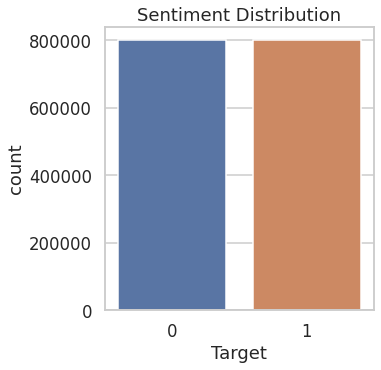

In [ ]:
##Let us quickly visualise the distribution of the target variable

sns.set(style="whitegrid")
sns.set_context('talk')

fig, ax =plt.subplots( figsize=(5,5))
fig.tight_layout()
sns.set_context('talk')
g = sns.countplot(x = "Target", data=data)
g.set_title("Sentiment Distribution",)

fig.show()

In [ ]:
print("Stats for User\n")
pd.DataFrame(data["User"].describe())

Stats for User



User
count    1600000
unique    659775
top     lost_dog
freq         549

In [ ]:
print("Number of Unique Users :", len(data["User"].unique()))

Number of Unique Users : 659775


In [ ]:
data = data.drop(columns=["Flag","Date","Id","User"])
data.head()

Target  ... Raw_word_count
0      0  ...             20
1      0  ...             22
2      0  ...             19
3      0  ...             11
4      0  ...             22

[5 rows x 4 columns]

In [ ]:
pd.options.display.max_colwidth = 1000
data.head(20)

Target  ... Raw_word_count
0       0  ...             20
1       0  ...             22
2       0  ...             19
3       0  ...             11
4       0  ...             22
5       0  ...              6
6       0  ...              4
7       0  ...             24
8       0  ...              7
9       0  ...              6
10      0  ...              8
11      0  ...              6
12      0  ...             21
13      0  ...             16
14      0  ...             23
15      0  ...             20
16      0  ...             19
17      0  ...              5
18      0  ...             12
19      0  ...             13

[20 rows x 4 columns]

The dataset doesnt seem to be shuffled, as the first 20 columns are negative . Therefore we will shuffle the dataset

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

Target  ... Raw_word_count
0      1  ...             19
1      1  ...             10
2      0  ...             15
3      1  ...             18
4      1  ...             10

[5 rows x 4 columns]

In [ ]:
x = pd.DataFrame(data['Tweet_Length'].describe())
x['Tweet_Length'] = x['Tweet_Length'].astype('int')
x 

Tweet_Length
count       1600000
mean             74
std              36
min               6
25%              44
50%              69
75%             104
max             374

In [ ]:
data["Sentiment"] = data['Target'].apply(lambda x: "Positive" if x=='1' else 'Negative')
data

Target  ... Sentiment
0            1  ...  Positive
1            1  ...  Positive
2            0  ...  Negative
3            1  ...  Positive
4            1  ...  Positive
...        ...  ...       ...
1599995      1  ...  Positive
1599996      0  ...  Negative
1599997      1  ...  Positive
1599998      1  ...  Positive
1599999      0  ...  Negative

[1600000 rows x 5 columns]

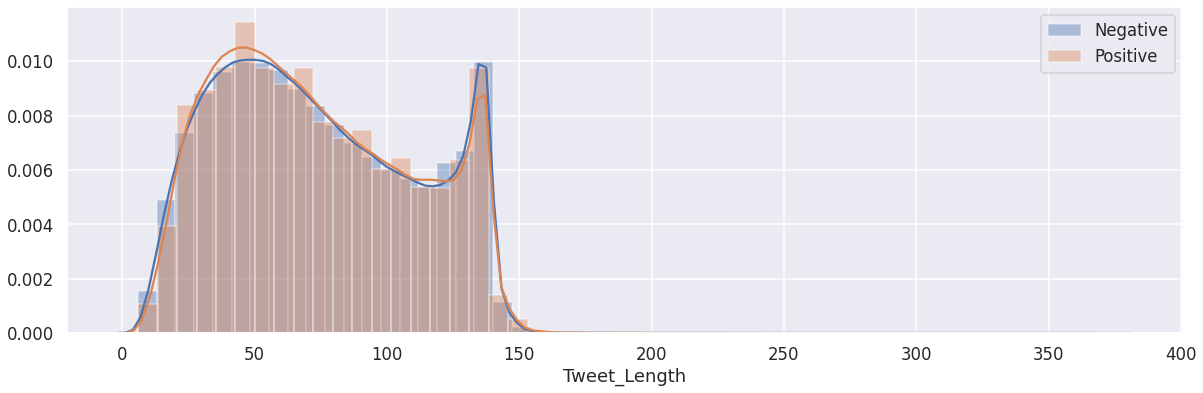

In [ ]:
sns.set()
sns.set_context('talk')
plt.subplots(figsize=(20,6))
sns.distplot(data.loc[data['Target']=='0','Tweet_Length'], label='Negative')
sns.distplot(data.loc[data['Target']=='1','Tweet_Length'], label='Positive')

plt.legend()
plt.show()


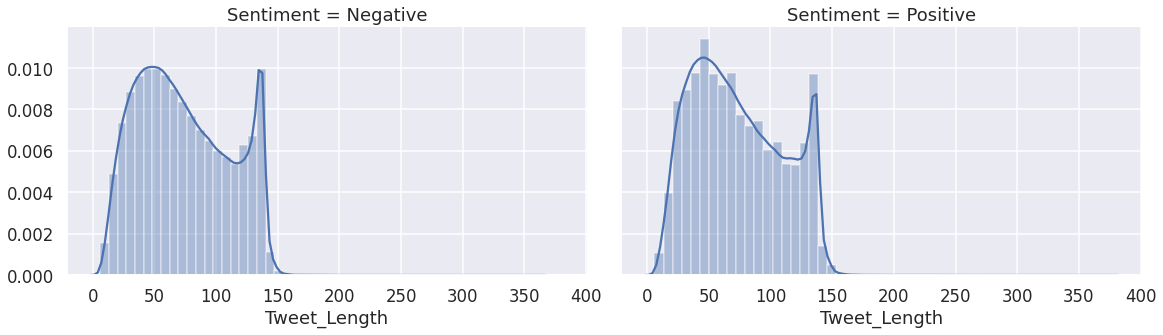

In [ ]:
g = sns.FacetGrid(data, col="Sentiment", height=5, aspect=1.65)
g.set_titles("By Sentiment")
g.map(sns.distplot, 'Tweet_Length')

plt.show()

Word level Analysis

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
n_words = 15
common_words = get_top_n_words(data['SentimentText'],n_words )
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])


In [ ]:
df1 = pd.DataFrame(df.groupby('ReviewText').sum()['count'].sort_values(ascending=False))
df1

count
ReviewText        
to          565880
the         523872
my          316829
it          304769
and         303603
you         302036
is          238328
in          216560
for         216348
of          183804
on          168356
that        165910
me          165711
so          154101
have        145611

## We want to see the results using plotly. this requires us to use a inbuilt functions

In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
from plotly.offline import iplot
import plotly.graph_objs as go

enable_plotly_in_cell()
df1['count'].iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


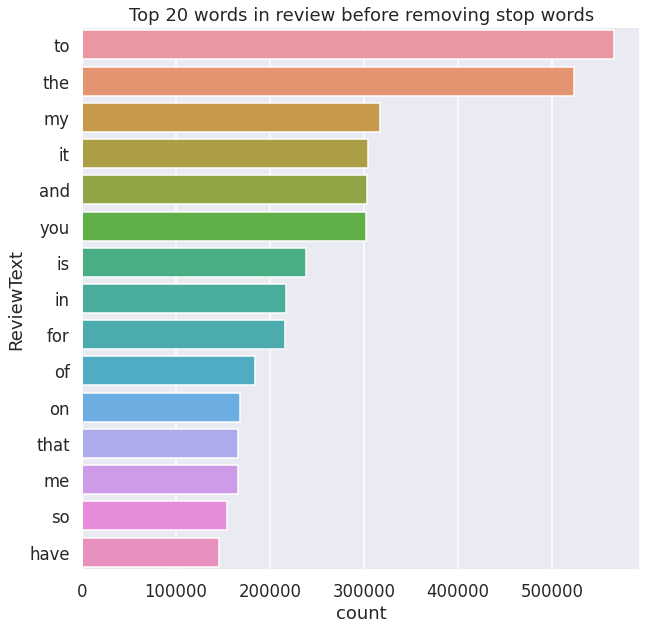

In [ ]:
sns.set_context('talk')
from numpy import median
plt.figure(figsize=(10,10))

df2 = df1.reset_index()
sns.barplot(x='count',y = 'ReviewText', data=df2,estimator=median ).set_title('Top 20 words in review before removing stop words')
plt.show()


# Data Description

After Transformations

Target (Sentiment): the polarity of the tweet (0 = negative, 1 = positive)

ids: The id of the tweet ( eg. 2087) #Removed

Date: the date of the tweet (eg. Sat May 16 23:58:44 UTC 2009) #removed

User: the user that tweeted (eg. robotickilldozr)

SentimentText: the text of the tweet (eg. Lyx is cool)


# Data Cleaning and preprocessing

### Setting up a cleaner function

In [ ]:
# Setting up a cleaning function

nltk.download('wordnet')
def dataclean(tweet):

  cleaned = re.sub("@[\w]*","", tweet)#removing handles
  cleaned = re.sub(r'http\S+', '', cleaned)#removing urls
  cleaned = ''.join([c for c in cleaned if c not in punctuation])#removing punctuations
  cleaned = cleaned.replace("[^a-zA-Z#]", "")#removing special charectars
  cleaned = ' '.join([w for w in cleaned.split() if len(w)>1])#removing short words
  cleaned = " ".join(w.lower() for w in cleaned.split())#converting to lower case

  #removing stop words
  stop = stopwords.words('english')
  cleaned = " ".join(x for x in cleaned.split() if x not in stop)

  #apply lemmatisation
  lem = nltk.WordNetLemmatizer()
  cleaned = " ".join([lem.lemmatize(word) for word in cleaned.split()])
  
  return cleaned


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Applying the cleaner function

In [ ]:
#cleaning up the training and test data

%time data['Cleaned'] = data['SentimentText'].apply(lambda x:dataclean(x))
data.to_csv("Cleaned_Data.csv")



CPU times: user 4min 40s, sys: 19.9 s, total: 5min
Wall time: 5min


## Visual Representaion of the classes

In [ ]:
%%time 

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_pos = data[data['Target']=="1"]
df_neg = data[data['Target']=="0"]

tweet_pos = " ".join(text for text in df_pos.Cleaned)
tweet_neg = " ".join(text for text in df_neg.Cleaned)

# Create and generate a word cloud image:

wordcloud_pos = WordCloud(max_font_size=50, max_words=250, background_color="white",stopwords='english').generate(tweet_pos)
wordcloud_neg = WordCloud(max_font_size=50, max_words=250, background_color="black",stopwords='english').generate(tweet_neg)

CPU times: user 1min 6s, sys: 2.75 s, total: 1min 9s
Wall time: 1min 9s


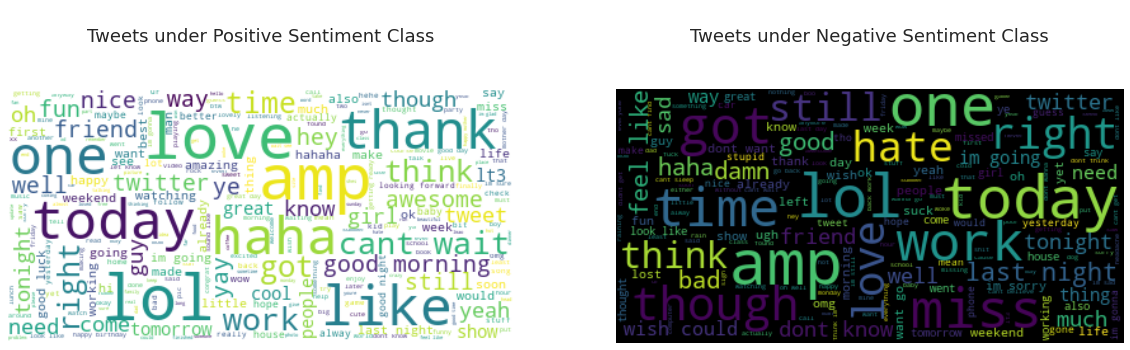

In [ ]:
#Generating word cloud

fig, ax = plt.subplots(1, 2, figsize  = (20,20))

#Positive Tweets
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].set_title('\nTweets under Positive Sentiment Class\n\n')
ax[0].axis('off')

#Negative Tweets
ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].set_title('\nTweets under Negative Sentiment Class\n\n')
ax[1].axis('off')

plt.show()

# Post Processing Exploratory Data Analysis

In [ ]:
data['Cleaned_count'] = data['Cleaned'].apply(lambda x:len(x.split(" "))).astype('int64')
data['Cleaned_Length'] = data['Cleaned'].apply(lambda x:len(x))

data.loc[:5, ['SentimentText',"Raw_word_count",'Tweet_Length','Cleaned',"Cleaned_count",'Cleaned_Length']]

SentimentText  ...  Cleaned_Length
0                  haaee guys   im bailey  ilove this guy HIMIONA xo  uhm im only 12 hahar mint  ...              61
1                                            annnnd got a pair of ankle length white converses   ...              43
2       @marrzbarz stop sleeping late Chups you're gonna have old lady syndrome the next night   ...              65
3  Just painted my nails and finished both of my projects, time for bed noww. Good night twits   ...              59
4                                                 Going offline now to spend time with the boy   ...              28
5                            Gah  i want to be better again! Being sick is ewwy and feels ewwwy  ...              36

[6 rows x 6 columns]

In [ ]:
pd.DataFrame(data.loc[data['Tweet_Length']>=140,
                      ['Tweet_Length','Cleaned','Raw_word_count','Cleaned_Length']]).sort_values(by='Tweet_Length', ascending=False)
                      

Tweet_Length  ... Cleaned_Length
1596831           374  ...            343
332033            369  ...            349
1077559           359  ...            338
1335412           359  ...            244
191296            348  ...            320
...               ...  ...            ...
674349            140  ...             84
1369236           140  ...            102
673310            140  ...             56
672006            140  ...            106
47                140  ...             69

[19905 rows x 4 columns]

In [ ]:
n_words = 25
x = get_top_n_words(data.loc[data.Target =='1','Cleaned'],n_words )
x1 = [token[0] for token in x]
x2 = [token[1] for token in x]

y = get_top_n_words(data.loc[data.Target =='0','Cleaned'],n_words )
y1 = [token[0] for token in y]
y2 = [token[1] for token in y]

df = pd.DataFrame([x1,x2,y1,y2]).transpose()
df.columns = ['Positive word', 'Count_positive','Negative word', 'Count_negative' ]
df


Positive word Count_positive Negative word Count_negative
0             im          74874            im         102648
1           good          60928           day          48417
2            day          52875           get          47778
3           love          49535            go          47607
4            get          38040          work          45538
5           like          37941          dont          44917
6         thanks          33914          cant          43599
7            lol          33498          like          41124
8           time          33178         today          36886
9          going          30651          want          34029
10            go          29799         going          33444
11         today          29202           got          32984
12           got          27771          back          32586
13           one          27561          miss          31863
14           new          26642        really          31223
15          know          26395          time          30579
16           see          25579         still          28776
17         great          24891          good          28595
18          well          24585           one          28314
19          back          23522           sad          27145
20         night          23004          know          26829
21           amp          22082          feel          25234
22          dont          22014          need          25184
23          work          20912          home          23890
24          haha          20783          wish          23386

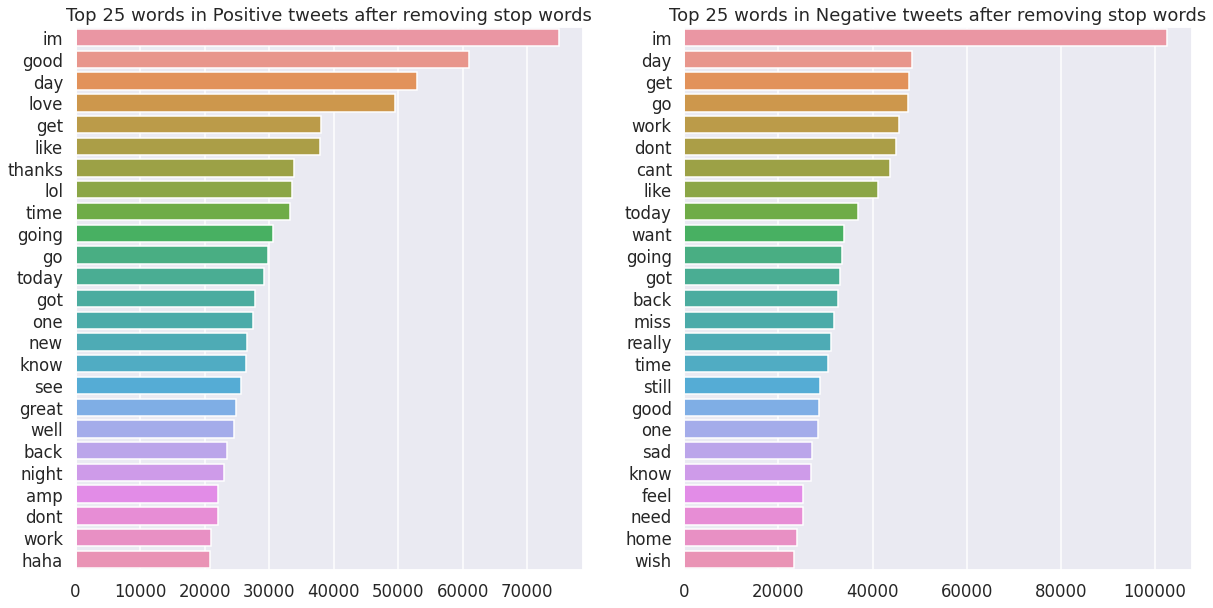

In [ ]:
sns.set_context('talk')
from numpy import median
fig, ax = plt.subplots(1, 2, figsize  = (20,10))


sns.barplot(x=x2,y =x1,ax=ax[0]).set_title('Top 25 words in Positive tweets after removing stop words')
sns.barplot(x=y2,y =y1, ax=ax[1]).set_title('Top 25 words in Negative tweets after removing stop words')

plt.show()

In [ ]:
n_words = 1000
x = get_top_n_words(data.loc[data.Target =='1','Cleaned'],n_words )
x1 = [token[0] for token in x]
x2 = [token[1] for token in x]

y = get_top_n_words(data.loc[data.Target =='0','Cleaned'],n_words )
y1 = [token[0] for token in y]
y2 = [token[1] for token in y]

len(set(x1).intersection(set(y1)))

803

In [ ]:
all_words = get_top_n_words(data.Cleaned)
a = len([token[0] for token in all_words]) 

n_words = a
x = get_top_n_words(data.loc[data.Target =='1','Cleaned'],n_words )
x1 = [token[0] for token in x]
x2 = [token[1] for token in x]

y = get_top_n_words(data.loc[data.Target =='0','Cleaned'],n_words )
y1 = [token[0] for token in y]
y2 = [token[1] for token in y]

b = len(set(x1).intersection(set(y1)))

print("Overlap :", round(b/a,4)*100)

Overlap : 20.68


# Baseline Model - Vader

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# # Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
# scores = sid.polarity_scores(df_pos['Cleaned'][0])

# for key in sorted(scores):
#   print('{0}: {1}, '.format(key, scores[key]), end='')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
%%time
data['CompoundScore'] = data['Cleaned'].apply(lambda x: sid.polarity_scores(x)['compound'] )
data

CPU times: user 2min 53s, sys: 607 ms, total: 2min 54s
Wall time: 2min 54s


In [ ]:
data['Pred'] = data['CompoundScore'].apply(lambda x: 1 if x>=0 else 0)
data

Target  ... Pred
0            1  ...    1
1            1  ...    1
2            0  ...    0
3            1  ...    1
4            1  ...    0
...        ...  ...  ...
1599995      1  ...    1
1599996      0  ...    1
1599997      1  ...    1
1599998      1  ...    1
1599999      0  ...    0

[1600000 rows x 10 columns]

In [ ]:
data['Pred'] = data['Pred'].astype('int')
data['Target'] = data['Target'].astype('int')

In [ ]:
data2 = data.loc[data.Cleaned_Length!=0,:]
score = metrics.accuracy_score(data2['Target'],data2['Pred'])
score

0.6442140257444562

In [ ]:
# if we ignore the columns where the length of the statements is less

In [ ]:
# https://programminghistorian.org/en/lessons/sentiment-analysis#exploring-text-with-sentiment-analysis

# Applying Machine Learning Models

## Training and Test Split

In [ ]:
# We do a random 80:20 split, and then we will ensure that the distribution of the sentiments is somewhat same in both 

from sklearn.model_selection import train_test_split
training, test = train_test_split(data, test_size=0.2, random_state =1)

print("Training data split\n" ,training["Target"].value_counts())
print("\n\n")
print("Test data split\n" ,test["Target"].value_counts())



Training data split
 1    640077
0    639923
Name: Target, dtype: int64



Test data split
 0    160077
1    159923
Name: Target, dtype: int64


In [ ]:
print(training.shape, test.shape)

(1280000, 10) (320000, 10)


In [ ]:
training.loc[:,"Target"] = training.loc[:,"Target"].astype('category') 
test.loc[:,"Target"] = test.loc[:,"Target"].astype('category') 


In [ ]:
print(training.loc[training['Cleaned_Length']<1].shape)
print(test.loc[test['Cleaned_Length']<1].shape)

(5615, 10)
(1343, 10)


In [ ]:
training = training.loc[training['Cleaned_Length']>0].reset_index(drop=True)
test = test.loc[test['Cleaned_Length']>0].reset_index(drop=True)

In [ ]:
print("Updated dimensions\n")
print("Training Records",training.shape[0],"\n\nTraining data split\n" ,training["Target"].value_counts())
print("\n\n")
print("Test Records",test.shape[0],"\n\nTest data split\n" ,test["Target"].value_counts())

Updated dimensions

Training Records 1274385 

Training data split
 1    637291
0    637094
Name: Target, dtype: int64



Test Records 318657 

Test data split
 0    159424
1    159233
Name: Target, dtype: int64


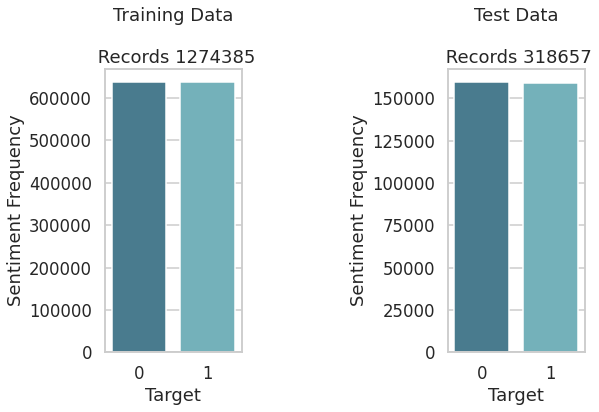

In [ ]:
##Let us quickly look at the distribution of the target variable

sns.set(style="whitegrid")
sns.set_context('talk')

fig, ax =plt.subplots(1,2 , figsize=(8,5))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None)

sns.countplot(training['Target'], ax=ax[0],palette='GnBu_d').set_title(str("Training Data\n\n Records " +str(training.shape[0])))
ax[0].set_ylabel("Sentiment Frequency")


sns.countplot(test['Target'], ax=ax[1],palette='GnBu_d').set_title(str("Test Data\n\n Records " +str(test.shape[0])))
ax[1].set_ylabel("Sentiment Frequency")
fig.show()

In [ ]:
# splitting the labels
y_train = training['Target']
y_test = test['Target']

## Bag of Words

## Preparing the features

### Bag of words - Count vectoriser

In [ ]:
count_vectorizer = CountVectorizer(stop_words ='english')
train_count = count_vectorizer.fit_transform(training['Cleaned'])
test_count =  count_vectorizer.transform(test['Cleaned'])

print("Training features", train_count.shape,"Training labels", y_train.shape)
print("Test", test_count.shape, "Teat Labels", y_test.shape)

Training features (1274385, 370733) Training labels (1274385,)
Test (318657, 370733) Teat Labels (318657,)


### TFIDF features

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=1, stop_words='english')

train_tfidf = tfidf_vectorizer.fit_transform(training['Cleaned'])
test_tfidf = tfidf_vectorizer.transform(test['Cleaned'])    

In [ ]:
print("Training", train_tfidf.shape, y_train.shape)
print("Test", test_tfidf.shape, y_test.shape)

## Multinominal Naive Bayes

In [ ]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

### Bag of words

In [ ]:
# Fit the classifier to the training data
nb_classifier.fit(train_count, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(test_count)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Model Accuracy\t",round(score,3))
print("")

# Detailed results
print("Classification Report : Bag of Words ")
print(classification_report(y_test,pred))

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=[1,0])
pd.DataFrame(cm)


Model Accuracy	 0.767

Classification Report : Bag of Words 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159424
           1       0.77      0.76      0.76    159233

    accuracy                           0.77    318657
   macro avg       0.77      0.77      0.77    318657
weighted avg       0.77      0.77      0.77    318657



0       1
0  120377   38856
1   35455  123969

3.35 0.768
CPU times: user 16.5 s, sys: 88.9 ms, total: 16.6 s
Wall time: 16.6 s


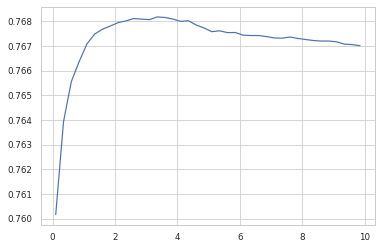

In [ ]:
%%time
# Create the list of alphas: alphas
alphas = np.arange(0.1,10,.25)

# Define train_and_predict()

def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(train_count, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(test_count)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

best = 0
all_scores=[]
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    # print('Alpha: ', alpha)
    # print('Score: ', train_and_predict(alpha))
    # print()
    myscore = train_and_predict(alpha)
    all_scores.append(myscore)
    if myscore>best:
      best = myscore
      best_alpha = alpha

print(round(best_alpha,3), round(best,3))
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')
sns.lineplot(x=alphas,y=all_scores)

In [ ]:
# Final Model

nb_classifier = MultinomialNB(alpha=best_alpha)
# Fit the classifier to the training data
nb_classifier.fit(train_count, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(test_count)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Model Accuracy\t",round(score,3))
print("")

# Detailed results
print("Classification Report : Bag of Words ")
print(classification_report(y_test,pred))

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=[1,0])
pd.DataFrame(cm)






Model Accuracy	 0.768

Classification Report : Bag of Words 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159424
           1       0.78      0.75      0.76    159233

    accuracy                           0.77    318657
   macro avg       0.77      0.77      0.77    318657
weighted avg       0.77      0.77      0.77    318657



0       1
0  119717   39516
1   34357  125067

### TFIDF 

In [ ]:
# Fit the classifier to the training data
nb_classifier.fit(train_tfidf, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(test_tfidf)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Model Accuracy\t",round(score,3))
print("")

# Detailed results
print("Classification Report : TFIDF ")
print(classification_report(y_test,pred))

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=[1,0])
pd.DataFrame(cm)


Model Accuracy	 0.76

Classification Report : TFIDF 
              precision    recall  f1-score   support

           0       0.76      0.77      0.76    159424
           1       0.77      0.75      0.76    159233

    accuracy                           0.76    318657
   macro avg       0.76      0.76      0.76    318657
weighted avg       0.76      0.76      0.76    318657



0       1
0  119484   39749
1   36573  122851

9.35 0.765


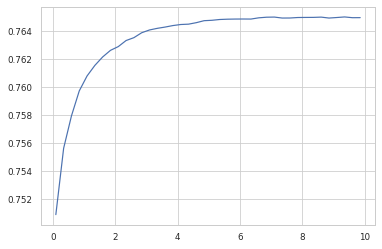

In [ ]:
# Create the list of alphas: alphas

alphas = np.arange(0.1,10,.25)

def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(train_tfidf, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(test_tfidf)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

best = 0
all_scores=[]
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    # print('Alpha: ', alpha)
    # print('Score: ', train_and_predict(alpha))
    # print()
    myscore = train_and_predict(alpha)
    all_scores.append(myscore)
    if myscore>best:
      best = myscore
      best_alpha = alpha

print(round(best_alpha,3), round(best,3))

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=alphas,y=all_scores)


In [ ]:
# Final Model

nb_classifier = MultinomialNB(alpha=best_alpha)
# Fit the classifier to the training data
nb_classifier.fit(train_tfidf, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(test_tfidf)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Model Accuracy\t",round(score,3))
print("")

# Detailed results
print("Classification Report : TFIDF ")
print(classification_report(y_test,pred))

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=[1,0])
pd.DataFrame(cm)

Model Accuracy	 0.765

Classification Report : TFIDF 
              precision    recall  f1-score   support

           0       0.75      0.79      0.77    159424
           1       0.78      0.74      0.76    159233

    accuracy                           0.77    318657
   macro avg       0.77      0.76      0.76    318657
weighted avg       0.77      0.77      0.76    318657



0       1
0  118027   41206
1   33675  125749

## Logistic Regression

### Bag of Words

In [ ]:
%%time
##crossvalidation to tune the best value for the penalty
C = [.01,.1,1]
print(datetime.now(tz))

best_c = -100000
best_acc = -100000
k = 2
print_score = []

for c in C:
  start= time.time()
  kf = KFold(k, shuffle=True, random_state=7) # Use for KFold classification
  fold_score = []

  score = []
  fold = 0
  
  for train, valid in kf.split(train_count):
    fold+=1
    x_train_cv = train_count[train]
    y_train_cv = y_train.iloc[train]
    x_val = train_count[valid]
    y_val = y_train.iloc[valid]
    # print( "Fold#", fold)

    model = LogisticRegression(penalty = 'l2',C = c,solver = 'saga', random_state = 2911, max_iter=1000)
    model.fit(x_train_cv,y_train_cv)

    pred = model.predict(x_val)
      

    # Measure this fold's RMSE
    m = metrics.accuracy_score(pred,y_val)
    
    # print(round(m,3))
    score.append(m)
  fold_score = np.array(score).mean()
  print(datetime.now(tz),c,fold_score, timeSince(start),'Best C = ', best_c, "For accuracy :", round(best_acc,3))

  print_score.append(round(fold_score,3))
  if best_acc < fold_score:
    best_acc=fold_score
    best_c = c

print('Best C = ', best_c, "For accuracy :", round(best_acc,3))


2020-06-17 09:16:21.119703-05:00
2020-06-17 09:16:47.729795-05:00 0.01 0.7592799666169879 0m 26s Best C =  -100000 For accuracy : -100000
2020-06-17 09:19:07.741436-05:00 0.1 0.7704045481985221 2m 20s Best C =  0.01 For accuracy : 0.759
2020-06-17 09:32:38.271943-05:00 1 0.7702491790605682 13m 30s Best C =  0.1 For accuracy : 0.77
Best C =  0.1 For accuracy : 0.77
CPU times: user 16min 16s, sys: 139 ms, total: 16min 16s
Wall time: 16min 17s


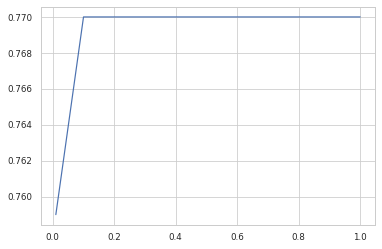

In [ ]:
sns.lineplot(x=C,y=print_score)

In [ ]:
%%time
#Final Model

model = LogisticRegression(penalty = 'l2',C = best_c,solver = 'saga', tol =.0001, random_state = 2911, max_iter=10000)
model.fit(train_count,y_train)
pred = model.predict(test_count)
print(metrics.accuracy_score(pred,y_test))
print(classification_report(y_test,pred.transpose()))

### TFIDF

In [ ]:
%%time
##crossvalidation to tune the best value for the penalty
C = [.01,.1,1]

best_c = -100000
best_acc = -100000
k = 3
print_score = []

for c in C:
  kf = KFold(k, shuffle=True, random_state=7) # Use for KFold classification
  fold_score = []

  score = []
  fold = 0
  

  for train, valid in kf.split(train_tfidf):
    fold+=1
    x_train_cv = train_tfidf[train]
    y_train_cv = y_train[train]
    x_val = train_tfidf[valid]
    y_val = y_train[valid]
    # print( "Fold#", fold)

    model = LogisticRegression(penalty = 'l2',C = c,solver = 'saga', tol =.0001, random_state = 2911)
    model.fit(x_train_cv,y_train_cv)

    pred = model.predict(x_val)
      

    # Measure this fold's RMSE
    m = metrics.accuracy_score(pred,y_val)
    # print(round(m,3))
    score.append(m)
  fold_score = np.array(score).mean()
  # print("Average Accuracy for C =",c,"=",round(fold_score,3))
  print_score.append(round(fold_score,3))


  if best_acc < fold_score:
    best_acc=fold_score
    best_c = c
  

print('Best C = ', best_c, "For accuracy :", round(best_acc,3))


Best C =  1 For accuracy : 0.774
CPU times: user 2min 25s, sys: 77.5 ms, total: 2min 25s
Wall time: 2min 25s


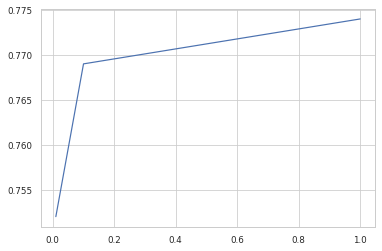

In [ ]:

sns.lineplot(x=C,y=print_score)

In [ ]:
#Final Model

model = LogisticRegression(penalty = 'l2',C = best_c,solver = 'saga', tol =.00000001, random_state = 2911, max_iter=100000)
model.fit(train_tfidf,y_train)
pred = model.predict(test_tfidf)
print(metrics.accuracy_score(pred,y_test))
print(classification_report(y_test,pred.transpose()))

0.7771239922549952
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    159424
           1       0.77      0.80      0.78    159233

    accuracy                           0.78    318657
   macro avg       0.78      0.78      0.78    318657
weighted avg       0.78      0.78      0.78    318657



## Neural Networks - Reccurent Neural Networks

### Variable Setup

In [ ]:
train_encoded_labels = np.array([1 if label ==1 else 0 for label in training['Target']])
test_encoded_labels = np.array([1 if label ==1 else 0 for label in test['Target']])

In [ ]:
training['Target'] = training['Target'].astype(int)
test['Target'] = test['Target'].astype(int)

In [ ]:
train_encoded_labels = np.array([1 if label ==1 else 0 for label in training['Target']])
test_encoded_labels = np.array([1 if label ==1 else 0 for label in test['Target']])

In [ ]:
set(train_encoded_labels)

{0, 1}

In [ ]:
set(test_encoded_labels)

{0, 1}

In [ ]:
from collections import Counter

all_text = ' '.join(data['Cleaned'])

# create a list of words
words = all_text.split()# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

tweets_int = []
for tweet in data['Cleaned']:
    r = [vocab_to_int[w] for w in tweet.split()]
    tweets_int.append(r)
print (tweets_int[0:3])
# tweets_int

[[2349, 2091, 2822, 13, 51, 2822, 2190, 3583, 7, 1816, 92, 1186, 1035, 189, 23, 29], [23, 6479, 12391, 213, 166, 33, 7065, 42091, 25, 7], [715]]


In [ ]:
train_tweets_int = [[vocab_to_int[w] for w in tweet.split()] for tweet in training['Cleaned']]
test_tweets_int = [[vocab_to_int[w] for w in tweet.split()] for tweet in test['Cleaned']]

print("Training records : ",len(train_tweets_int), "Test records : ", len(test_tweets_int) )

Training records :  1274446 Test records :  318596


In [ ]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review        
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

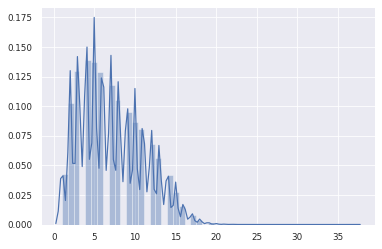

In [ ]:
# distribution of word counts in training data
revised_len = [len(x) for x in train_tweets_int]
sns.set_context('paper')
sns.distplot(pd.Series(revised_len))


In [ ]:
print("Max Tweet words",pd.Series(revised_len).max())
print("Min Tweet words",pd.Series(revised_len).min())
print("Mean Tweet words",round(pd.Series(revised_len).mean()))
print("Standard deviation of Tweet words",round(pd.Series(revised_len).std()))

padding_value  = int(round(pd.Series(revised_len).mean() + 3*pd.Series(revised_len).std(),-1))

print("Padding value = ",padding_value)

Max Tweet words 37
Min Tweet words 1
Mean Tweet words 7
Standard deviation of Tweet words 4
Padding value =  20


In [ ]:
train_features = pad_features(train_tweets_int,padding_value)
test_features = pad_features(test_tweets_int,padding_value)


### Carving out a validation set

In [ ]:
split_frac = 0.8
train_x = train_features[0:int(split_frac*len(train_tweets_int))]
train_y = train_encoded_labels[0:int(split_frac*len(train_tweets_int))]

valid_x = train_features[int(split_frac*len(train_tweets_int)):]
valid_y = train_encoded_labels[int(split_frac*len(train_tweets_int)):]

test_x = test_features
test_y = test_encoded_labels

print(valid_x.shape, valid_y.shape)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(254890, 20) (254890,)
(1019556, 20) (1019556,)
(318596, 20) (318596,)


### Setup the Model

In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):      
        
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        if torch.cuda.is_available():
          device = 'cuda'
        else:
          device = 'cpu'
        
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim).to(device)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True).to(device)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3).to(device)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size).to(device)
        self.sig = nn.Sigmoid().to(device)        

    def forward(self, x, hidden):
        
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        embeds = embeds.to(device)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        h = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

        hidden = (h.to(device),h.to(device) )    

        return hidden

In [ ]:
device='cpu'
if torch.cuda.is_available():
  device = torch.device("cuda")
print("Device", device)

Device cuda


In [ ]:
from datetime import datetime
import pytz
 

import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

tz = pytz.timezone('America/Chicago') 
datetime_CH = datetime.now(tz)
print(datetime_CH)

2020-06-13 21:19:28.694356-05:00


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset# create Tensor datasets

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))# dataloaders

batch_size = 50# make sure to SHUFFLE your data

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)



In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 40
hidden_dim = 30
n_layers = 1
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0)
net = net.to(device)
print("Model\n",net)

if torch.cuda.is_available():
  train_on_gpu=True
else:
  train_on_gpu=False

# loss and optimization functions
lr=0.5
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# training params
epochs = 100
clip=5 # gradient clipping



Model
 SentimentLSTM(
  (embedding): Embedding(440294, 40)
  (lstm): LSTM(40, 30, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=30, out_features=1, bias=True)
  (sig): Sigmoid()
)


### Setup the Datasets and DataLoaders

In [ ]:
import torch 
device='cpu'
if torch.cuda.is_available():
  device = torch.device("cuda")
print("Device", device)

Device cuda


### Using a singler layer for LSTM

In [ ]:
%%time

print("Start at " , datetime.now(tz))

train_accs = []
val_accs = []

threshold = 0
num_epoch_stop = 4

min_loss =np.Inf
ep_val_loss = []
# Training the network for specified epochs
for e in range(epochs):
  start = time.time()
  counter = 0
  val_counter = 0
  net.train() 
  num_correct_train = 0
  

  # initialize hidden state 
  h = net.init_hidden(batch_size)
  for inputs, labels in train_loader:
    inputs,labels = inputs.to(device), labels.to(device)
    inputs = inputs.type(torch.LongTensor).to(device)

    #checking if the dataset is divisible by batch size, to see if we need to adjust dimensions for the last batch 
    if train_x.shape[0]%batch_size !=0:
      if counter >=train_x.shape[0] - train_x.shape[0]%batch_size : #adjust for the last batch
        h = net.init_hidden(train_x.shape[0]%batch_size)
      
      
    counter+=batch_size
    
    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data.to(device) for each in h])

    # zero accumulated gradients
    net.zero_grad()        
    
    # get the output from the model
    output, h = net(inputs, h)

    # calculate the loss and perform backprop
    loss = criterion(output.squeeze(), labels.float())
    loss.backward()
    # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
    nn.utils.clip_grad_norm_(net.parameters(), clip)
    optimizer.step()

    #training accuracy
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct_train = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct_train += np.sum(correct_train)
    
  val_h = net.init_hidden(batch_size)    
  val_losses = []
  num_correct = 0
  
  net.eval()
  for inputs, labels in valid_loader:
    inputs,labels = inputs.to(device), labels.to(device) #sending data to the device
    inputs = inputs.type(torch.LongTensor).to(device) 
    #checking if the dataset is divisible by batch size, to see if we need to adjust dimensions for the last batch    
    if valid_x.shape[0]%batch_size !=0: 
      if val_counter>=valid_x.shape[0] - valid_x.shape[0]%batch_size: #adjust for the last batch
        val_h = net.init_hidden(valid_x.shape[0]%batch_size)

    val_counter+=batch_size        

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    val_h = tuple([each.data.to(device) for each in val_h])
    output, val_h = net(inputs, val_h)


    val_loss = criterion(output.squeeze(), labels.float())
    val_losses.append(val_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

  if np.mean(val_losses) < min_loss:
    min_loss = np.mean(val_losses)
    threshold = 0
  else:
    threshold +=1
    # print("{}/{} Min loss {}, Val loss {}".format(threshold,num_epoch_stop,min_loss,np.mean(val_losses)) )

  if threshold >num_epoch_stop:
    print("Early stopping at ",e+1)
    break


      # accuracy over all validation data
  val_acc = num_correct/valid_x.shape[0]
  val_accs.append(val_acc)
  ep_val_loss.append(sum(val_losses)/len(val_losses))



  # accuracy over all training data
  train_acc = num_correct_train/train_x.shape[0]
  train_accs.append(train_acc)  


  print("Epoch: {}/{}\t".format(e+1, epochs),
        "Val Loss: {:.3f}\t".format(np.mean(val_losses)),
        "Training Accuracy: {:.3f}".format(train_acc),
        "Valid accuracy: {:.3f}".format(val_acc),
        "Epoch Time", timeSince(start))  

  
torch.save(net, "LSTM.bin")
print("End at " , datetime.now(tz))



Start at  2020-06-13 21:19:51.818586-05:00
Epoch: 1/100	 Val Loss: 0.504	 Training Accuracy: 0.722 Valid accuracy: 0.753 Epoch Time 1m 54s
Epoch: 2/100	 Val Loss: 0.490	 Training Accuracy: 0.755 Valid accuracy: 0.763 Epoch Time 1m 54s
Epoch: 3/100	 Val Loss: 0.483	 Training Accuracy: 0.763 Valid accuracy: 0.768 Epoch Time 1m 54s
Epoch: 4/100	 Val Loss: 0.479	 Training Accuracy: 0.769 Valid accuracy: 0.769 Epoch Time 1m 54s
Epoch: 5/100	 Val Loss: 0.477	 Training Accuracy: 0.773 Valid accuracy: 0.774 Epoch Time 1m 53s
Epoch: 6/100	 Val Loss: 0.480	 Training Accuracy: 0.777 Valid accuracy: 0.770 Epoch Time 1m 54s
Epoch: 7/100	 Val Loss: 0.469	 Training Accuracy: 0.779 Valid accuracy: 0.778 Epoch Time 1m 54s
Epoch: 8/100	 Val Loss: 0.468	 Training Accuracy: 0.782 Valid accuracy: 0.778 Epoch Time 1m 53s
Epoch: 9/100	 Val Loss: 0.466	 Training Accuracy: 0.784 Valid accuracy: 0.779 Epoch Time 1m 54s
Epoch: 10/100	 Val Loss: 0.464	 Training Accuracy: 0.786 Valid accuracy: 0.780 Epoch Time 1m 

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning:

Couldn't retrieve source code for container of type SentimentLSTM. It won't be checked for correctness upon loading.



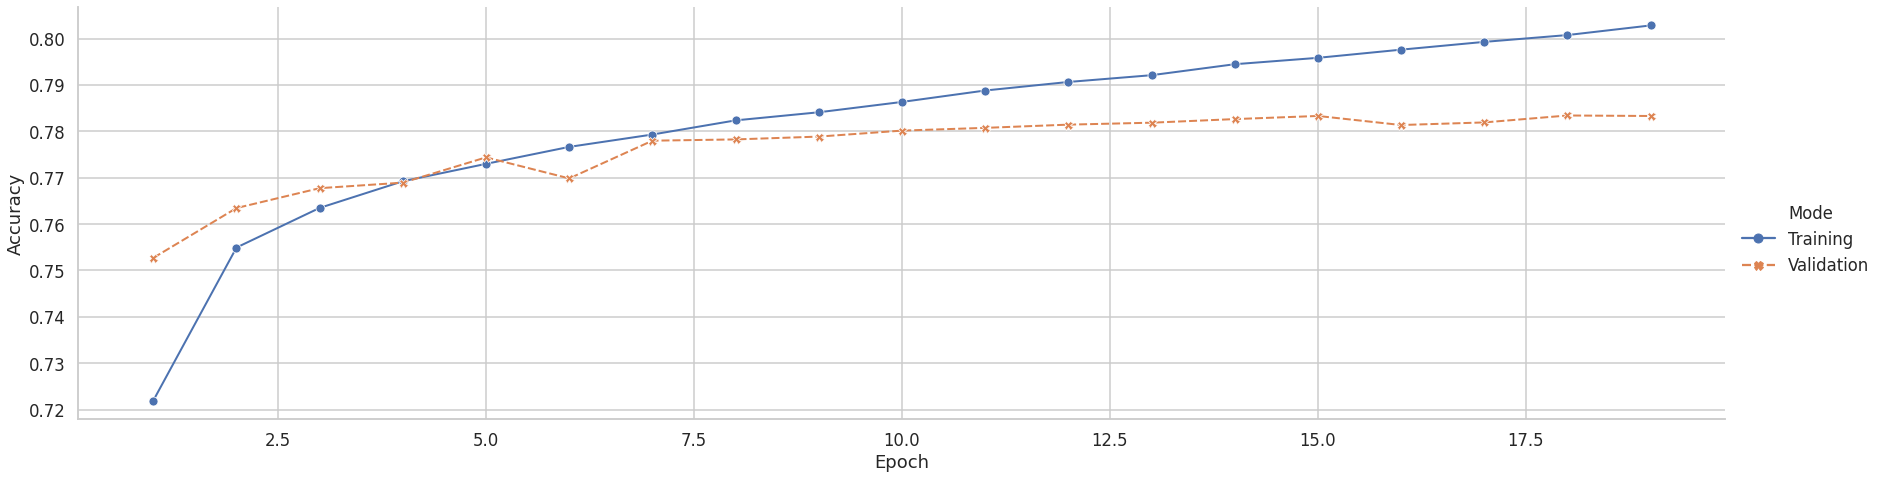

In [ ]:
# perf = pd.read_csv("Results.csv")

#performance 
ep = [ int(i) for i in range(1,len(train_accs)+1)]
perf = [ep,train_accs,val_accs]
perf = pd.DataFrame(perf).transpose()
perf.columns = ["Epoch","Training", "Validation"]
perf.to_csv("Results_1.csv")

data1 = pd.melt(perf, id_vars = ['Epoch'],value_vars=["Training", "Validation"])
data1.columns = ['Epoch', 'Mode', 'Accuracy']

sns.set("talk")
sns.set_style('whitegrid')

sns.relplot(x='Epoch', y='Accuracy', hue='Mode',style = 'Mode', 
            data=data1, linewidth=2,markers = True, kind = 'line',
            height =7, aspect=3.5)

plt.show()

In [ ]:
# Get test data loss and accuracy
test_losses = [] # track loss
num_correct_test = 0

label_test = []
test_res = [] 


# init hidden state
h = net.init_hidden(batch_size)
test_counter = 0
net.eval()
# iterate over test data
for inputs, labels in test_loader:
  inputs, labels = inputs.to(device), labels.to(device)
  inputs = inputs.type(torch.LongTensor).to(device)
  
  if test_x.shape[0]%batch_size !=0:
    if test_counter >=test_x.shape[0] - test_x.shape[0]%batch_size:
      h = net.init_hidden(test_x.shape[0]%batch_size)

  

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data.to(device) for each in h])

  # get predicted outputs
  output, h = net(inputs, h)
  
  # calculate loss
  test_loss = criterion(output.squeeze(), labels.float())
  test_losses.append(test_loss.item())
  
  # convert output probabilities to predicted class (0 or 1)
  pred = torch.round(output.squeeze())  # rounds to the nearest integer
  
  # compare predictions to true label
  correct_tensor = pred.eq(labels.float().view_as(pred))
  correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
  num_correct_test += np.sum(correct)

  label_test += list(labels.cpu().numpy())
  test_res +=list(pred.detach().cpu().numpy())
  
  test_counter +=batch_size


myindex = np.arange(len(test_loader.dataset))
mycm = pd.DataFrame({'Index': myindex,'True Labels': label_test, 'Predicted Labels': list(test_res)}, 
                    columns=['Index','True Labels', 'Predicted Labels'])


#print(mycm.head(10))
finalcm = pd.crosstab(mycm['True Labels'], mycm['Predicted Labels'], 
                     rownames=['True Labels'], colnames=['Predicted Labels'])


# -- stats! -- ##
# avg test loss
# accuracy over all test data
test_acc = num_correct_test/len(test_loader.dataset)

print(round(test_acc,3))
finalcm

78.5 %


Predicted Labels     0.0     1.0
True Labels                     
0                 126132   33655
1                  34925  123884